## Insurance Purchase Prediction
### Part I - Data Cleaning & Exploratory Analysis
### Group 3: Vivek | Gurunathan C | Gnana CP

In [139]:
# as pd/np/plt gives the library other name which makes it easy for coders to call the library again using shortened given names

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm 
import seaborn as sns
%matplotlib inline

In [140]:
df_train = pd.read_csv('../Data/train.csv')

In [141]:
df_train.describe()

,customer_ID,shopping_pt,record_type,day,location,group_size,homeowner,car_age,risk_factor,age_oldest,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
count,6.652490e+05,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,424831.000000,665249.000000,...,646538.000000,646538.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000
mean,1.007655e+07,4.219966,0.145824,1.969429,12271.543022,1.234784,0.536229,8.139437,2.563996,44.992403,...,2.444718,6.003774,0.927546,0.454236,2.275265,2.454299,0.445193,1.162768,2.275120,635.785008
std,4.404978e+04,2.394369,0.352930,1.453470,1564.789415,0.461036,0.498686,5.764598,1.111584,17.403440,...,1.034596,4.680793,0.595221,0.497902,0.990798,0.753953,0.496987,0.943594,0.909567,45.993758
min,1.000000e+07,1.000000,0.000000,0.000000,10001.000000,1.000000,0.000000,0.000000,1.000000,18.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,260.000000
25%,1.003852e+07,2.000000,0.000000,1.000000,10936.000000,1.000000,0.000000,3.000000,2.000000,28.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,605.000000
50%,1.007640e+07,4.000000,0.000000,2.000000,12027.000000,1.000000,1.000000,7.000000,3.000000,44.000000,...,3.000000,5.000000,1.000000,0.000000,2.000000,3.000000,0.000000,1.000000,2.000000,635.000000
75%,1.011470e+07,6.000000,0.000000,3.000000,13426.000000,1.000000,1.000000,12.000000,4.000000,60.000000,...,3.000000,9.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000,3.000000,665.000000
max,1.015272e+07,13.000000,1.000000,6.000000,16580.000000,4.000000,1.000000,85.000000,4.000000,75.000000,...,4.000000,15.000000,2.000000,1.000000,4.000000,3.000000,1.000000,3.000000,4.000000,922.000000


In [142]:
df_train.tail()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
665244,10152724,2,0,3,13:43,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,677
665245,10152724,3,0,3,13:43,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,677
665246,10152724,4,0,3,13:44,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,677
665247,10152724,5,0,3,13:46,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,685
665248,10152724,6,1,1,15:14,KY,10204,1,1,1,...,4.0,4.0,1,0,3,3,0,2,2,681


In [143]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        665249 non-null  int64  
 1   shopping_pt        665249 non-null  int64  
 2   record_type        665249 non-null  int64  
 3   day                665249 non-null  int64  
 4   time               665249 non-null  object 
 5   state              665249 non-null  object 
 6   location           665249 non-null  int64  
 7   group_size         665249 non-null  int64  
 8   homeowner          665249 non-null  int64  
 9   car_age            665249 non-null  int64  
 10  car_value          663718 non-null  object 
 11  risk_factor        424831 non-null  float64
 12  age_oldest         665249 non-null  int64  
 13  age_youngest       665249 non-null  int64  
 14  married_couple     665249 non-null  int64  
 15  C_previous         646538 non-null  float64
 16  du

In [144]:
# "Cleaning" the data
# Let’s check if we have any missing data -- the result shows that yes, and a lot
pd.DataFrame(df_train).isna().sum()

customer_ID               0
shopping_pt               0
record_type               0
day                       0
time                      0
state                     0
location                  0
group_size                0
homeowner                 0
car_age                   0
car_value              1531
risk_factor          240418
age_oldest                0
age_youngest              0
married_couple            0
C_previous            18711
duration_previous     18711
A                         0
B                         0
C                         0
D                         0
E                         0
F                         0
G                         0
cost                      0
dtype: int64

In [85]:
df_train['state'] = df_train['state'].astype('category')
df_train['state'] = df_train['state'].cat.codes

df_train['car_value'] = df_train['car_value'].astype('category')
df_train['car_value'] = df_train['car_value'].cat.codes

df_train['record_type'] = df_train['record_type'].astype('category')
df_train['record_type'] = df_train['record_type'].cat.codes

from datetime import date
df_train['time'] = pd.to_datetime(df_train['time'], format='%H:%M').dt.hour

In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        665249 non-null  int64  
 1   shopping_pt        665249 non-null  int64  
 2   record_type        665249 non-null  int8   
 3   day                665249 non-null  int64  
 4   time               665249 non-null  int64  
 5   state              665249 non-null  int8   
 6   location           665249 non-null  int64  
 7   group_size         665249 non-null  int64  
 8   homeowner          665249 non-null  int64  
 9   car_age            665249 non-null  int64  
 10  car_value          665249 non-null  int8   
 11  risk_factor        424831 non-null  float64
 12  age_oldest         665249 non-null  int64  
 13  age_youngest       665249 non-null  int64  
 14  married_couple     665249 non-null  int64  
 15  C_previous         646538 non-null  float64
 16  du

In [87]:
# Let’s check if we have any missing data -- the result shows that yes, and a lot
pd.DataFrame(df_train).isna().sum()

customer_ID               0
shopping_pt               0
record_type               0
day                       0
time                      0
state                     0
location                  0
group_size                0
homeowner                 0
car_age                   0
car_value                 0
risk_factor          240418
age_oldest                0
age_youngest              0
married_couple            0
C_previous            18711
duration_previous     18711
A                         0
B                         0
C                         0
D                         0
E                         0
F                         0
G                         0
cost                      0
dtype: int64

In [88]:
df_train = df_train.drop(columns= ['risk_factor'])

In [89]:
# *** fixing categorical ***

# Define function and storing in variable imputer_cat
  # "np.nan" pick up values that are blank or not available
  # "strategy" what it suppose replace with - meam, median, or constant value
  # NaN is usually used as the placeholder for missing values. However, it enforces the data type to be float. 
  # The parameter missing_values allows to specify other placeholder such as integer.
imputer_cat = SimpleImputer(missing_values = np.nan, strategy='constant')

# Fit the function
  # exclude int and floats while replacing
imputer_cat.fit(df_train.select_dtypes(exclude=['int64','float64']))

# Transform
df_train[df_train.select_dtypes(exclude=['int64','float64']).columns] \
   = imputer_cat.transform(df_train.select_dtypes(exclude=['int64','float64']))

In [90]:
# *** fixing numerical ***

imputer = SimpleImputer(missing_values = np.nan, strategy='median')

imputer.fit(df_train.select_dtypes(include=['int64','float64']))

df_train[df_train.select_dtypes(include=['int64','float64']).columns] \
   = imputer.transform(df_train.select_dtypes(include=['int64','float64']))

In [91]:
pd.DataFrame(df_train).isna().sum()

customer_ID          0
shopping_pt          0
record_type          0
day                  0
time                 0
state                0
location             0
group_size           0
homeowner            0
car_age              0
car_value            0
age_oldest           0
age_youngest         0
married_couple       0
C_previous           0
duration_previous    0
A                    0
B                    0
C                    0
D                    0
E                    0
F                    0
G                    0
cost                 0
dtype: int64

In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        665249 non-null  float64
 1   shopping_pt        665249 non-null  float64
 2   record_type        665249 non-null  int8   
 3   day                665249 non-null  float64
 4   time               665249 non-null  float64
 5   state              665249 non-null  int8   
 6   location           665249 non-null  float64
 7   group_size         665249 non-null  float64
 8   homeowner          665249 non-null  float64
 9   car_age            665249 non-null  float64
 10  car_value          665249 non-null  int8   
 11  age_oldest         665249 non-null  float64
 12  age_youngest       665249 non-null  float64
 13  married_couple     665249 non-null  float64
 14  C_previous         665249 non-null  float64
 15  duration_previous  665249 non-null  float64
 16  A 

### Exploratory Analysis

In [93]:
df_train.describe()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
count,6.652490e+05,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,...,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000
mean,1.007655e+07,4.219966,0.145824,1.969429,12.666448,16.842008,12271.543022,1.234784,0.536229,8.139437,...,2.460336,5.975541,0.927546,0.454236,2.275265,2.454299,0.445193,1.162768,2.275120,635.785008
std,4.404978e+04,2.394369,0.352930,1.453470,2.713539,10.108999,1564.789415,0.461036,0.498686,5.764598,...,1.024066,4.617480,0.595221,0.497902,0.990798,0.753953,0.496987,0.943594,0.909567,45.993758
min,1.000000e+07,1.000000,0.000000,0.000000,0.000000,0.000000,10001.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,260.000000
25%,1.003852e+07,2.000000,0.000000,1.000000,10.000000,6.000000,10936.000000,1.000000,0.000000,3.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,605.000000
50%,1.007640e+07,4.000000,0.000000,2.000000,13.000000,20.000000,12027.000000,1.000000,1.000000,7.000000,...,3.000000,5.000000,1.000000,0.000000,2.000000,3.000000,0.000000,1.000000,2.000000,635.000000
75%,1.011470e+07,6.000000,0.000000,3.000000,15.000000,25.000000,13426.000000,1.000000,1.000000,12.000000,...,3.000000,9.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000,3.000000,665.000000
max,1.015272e+07,13.000000,1.000000,6.000000,23.000000,35.000000,16580.000000,4.000000,1.000000,85.000000,...,4.000000,15.000000,2.000000,1.000000,4.000000,3.000000,1.000000,3.000000,4.000000,922.000000


In [94]:
df_train['A'] = df_train['A'].astype('int64')
df_train['B'] = df_train['B'].astype('int64')
df_train['C'] = df_train['C'].astype('int64')
df_train['D'] = df_train['D'].astype('int64')
df_train['E'] = df_train['E'].astype('int64')
df_train['F'] = df_train['F'].astype('int64')
df_train['G'] = df_train['G'].astype('int64')

In [95]:
df_train['CombOpt'] = df_train['A'].map(str) + df_train['B'].map(str) + df_train['C'].map(str) + df_train['D'].map(str) + df_train['E'].map(str) + df_train['F'].map(str) + df_train['G'].map(str)

In [105]:
df_train.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,duration_previous,A,B,C,D,E,F,G,cost,CombOpt
0,10000000.0,1.0,0,0.0,8.0,10,10001.0,2.0,0.0,2.0,...,2.0,1,0,2,2,1,2,2,633.0,1022122
1,10000000.0,2.0,0,0.0,8.0,10,10001.0,2.0,0.0,2.0,...,2.0,1,0,2,2,1,2,1,630.0,1022121
2,10000000.0,3.0,0,0.0,8.0,10,10001.0,2.0,0.0,2.0,...,2.0,1,0,2,2,1,2,1,630.0,1022121
3,10000000.0,4.0,0,0.0,8.0,10,10001.0,2.0,0.0,2.0,...,2.0,1,0,2,2,1,2,1,630.0,1022121
4,10000000.0,5.0,0,0.0,11.0,10,10001.0,2.0,0.0,2.0,...,2.0,1,0,2,2,1,2,1,630.0,1022121


<AxesSubplot:xlabel='record_type', ylabel='cost'>

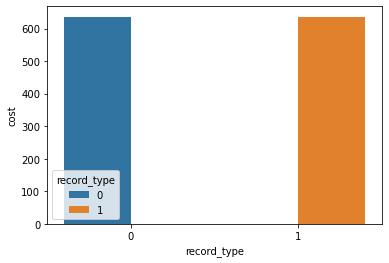

In [107]:
# Analysing the cost impact for the Purchase decision
sns.barplot(x='record_type', y='cost', hue='record_type',  data=df_train)

In [108]:
# retaining only the records that were actual purchases
purchase = df_train.loc[df_train['record_type'] == 1]

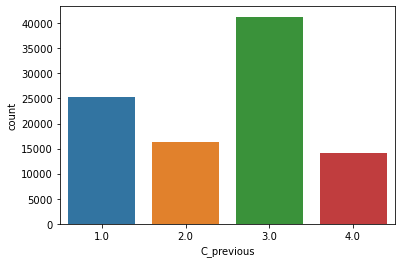

In [109]:
# Analyzing whether the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
sns.countplot(data=purchase,x='C_previous')
plt.show()

In [159]:
purchase.CombOpt.value_counts()

0011002    1998
1133123    1818
0033002    1515
1133113    1492
1133102    1301
           ... 
1031112       1
1041001       1
0022033       1
0022113       1
2012114       1
Name: CombOpt, Length: 1522, dtype: int64

In [110]:
purchase.shape

(97009, 25)

In [116]:
vlist = ['record_type', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
df_train[vlist]

,record_type,A,B,C,D,E,F,G
0,0,1,0,2,2,1,2,2
1,0,1,0,2,2,1,2,1
2,0,1,0,2,2,1,2,1
3,0,1,0,2,2,1,2,1
4,0,1,0,2,2,1,2,1
...,...,...,...,...,...,...,...,...
665244,0,1,0,2,3,0,2,2
665245,0,1,0,2,3,0,2,2
665246,0,1,0,2,3,0,2,2
665247,0,1,0,2,3,0,2,2


<AxesSubplot:>

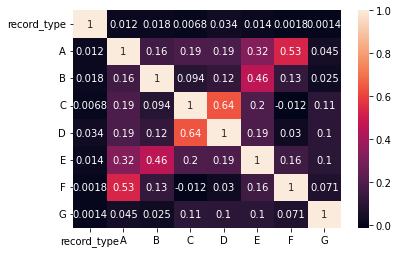

In [117]:
sns.heatmap(df_train[vlist].corr(),annot=True)

In [119]:
# Exporting cleaned data to CSV
df_train.to_csv("../Data/train_clean.csv")

## Now Cleaning up the *TEST* dataset

In [121]:
df_test = pd.read_csv('../Data/test_v2.csv')

In [122]:
df_test.describe()


,customer_ID,shopping_pt,record_type,day,location,group_size,homeowner,car_age,risk_factor,age_oldest,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
count,1.988560e+05,198856.000000,198856.0,198856.000000,198178.000000,198856.000000,198856.000000,198856.000000,123369.000000,198856.000000,...,189087.000000,189087.000000,198856.000000,198856.000000,198856.000000,198856.000000,198856.000000,198856.000000,198856.000000,198856.000000
mean,1.007608e+07,2.653966,0.0,1.912359,12322.615855,1.232424,0.539496,8.098317,2.549352,45.797562,...,2.435070,6.313385,0.899234,0.437437,2.269773,2.406958,0.427958,1.143536,2.296722,633.915019
std,4.410397e+04,1.602248,0.0,1.442332,1592.510709,0.454229,0.498439,5.746131,1.111686,17.443553,...,1.033821,4.663719,0.591436,0.496072,0.982279,0.774335,0.494784,0.946897,0.929100,47.052394
min,1.000000e+07,1.000000,0.0,0.000000,10001.000000,1.000000,0.000000,0.000000,1.000000,18.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,290.000000
25%,1.003773e+07,1.000000,0.0,1.000000,10962.000000,1.000000,0.000000,3.000000,2.000000,29.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,602.000000
50%,1.007640e+07,2.000000,0.0,2.000000,12072.000000,1.000000,1.000000,7.000000,3.000000,45.000000,...,3.000000,5.000000,1.000000,0.000000,2.000000,3.000000,0.000000,1.000000,2.000000,632.000000
75%,1.011427e+07,4.000000,0.0,3.000000,13504.000000,1.000000,1.000000,12.000000,4.000000,61.000000,...,3.000000,9.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000,3.000000,664.000000
max,1.015272e+07,11.000000,0.0,6.000000,16581.000000,4.000000,1.000000,67.000000,4.000000,75.000000,...,4.000000,15.000000,2.000000,1.000000,4.000000,3.000000,1.000000,3.000000,4.000000,907.000000


In [123]:
df_test.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000001,1,0,1,12:35,OK,10002.0,1,0,9,...,3.0,9.0,0,0,1,1,0,0,4,543
1,10000001,2,0,1,12:36,OK,10002.0,1,0,9,...,3.0,9.0,2,1,1,3,1,3,2,611
2,10000002,1,0,4,12:19,PA,10003.0,1,1,7,...,2.0,15.0,2,0,2,3,1,2,2,691
3,10000002,2,0,4,12:21,PA,10003.0,1,1,7,...,2.0,15.0,2,0,2,3,1,2,2,695
4,10000003,1,0,3,17:12,AR,10004.0,1,0,4,...,3.0,1.0,1,0,1,1,0,2,2,628


In [124]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198856 entries, 0 to 198855
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        198856 non-null  int64  
 1   shopping_pt        198856 non-null  int64  
 2   record_type        198856 non-null  int64  
 3   day                198856 non-null  int64  
 4   time               198856 non-null  object 
 5   state              198856 non-null  object 
 6   location           198178 non-null  float64
 7   group_size         198856 non-null  int64  
 8   homeowner          198856 non-null  int64  
 9   car_age            198856 non-null  int64  
 10  car_value          198117 non-null  object 
 11  risk_factor        123369 non-null  float64
 12  age_oldest         198856 non-null  int64  
 13  age_youngest       198856 non-null  int64  
 14  married_couple     198856 non-null  int64  
 15  C_previous         189087 non-null  float64
 16  du

In [125]:
df_test['state'] = df_test['state'].astype('category')
df_test['state'] = df_test['state'].cat.codes

df_test['car_value'] = df_test['car_value'].astype('category')
df_test['car_value'] = df_test['car_value'].cat.codes

from datetime import date
df_test['time'] = pd.to_datetime(df_test['time'], format='%H:%M').dt.hour

In [126]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198856 entries, 0 to 198855
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        198856 non-null  int64  
 1   shopping_pt        198856 non-null  int64  
 2   record_type        198856 non-null  int64  
 3   day                198856 non-null  int64  
 4   time               198856 non-null  int64  
 5   state              198856 non-null  int8   
 6   location           198178 non-null  float64
 7   group_size         198856 non-null  int64  
 8   homeowner          198856 non-null  int64  
 9   car_age            198856 non-null  int64  
 10  car_value          198856 non-null  int8   
 11  risk_factor        123369 non-null  float64
 12  age_oldest         198856 non-null  int64  
 13  age_youngest       198856 non-null  int64  
 14  married_couple     198856 non-null  int64  
 15  C_previous         189087 non-null  float64
 16  du

In [127]:
# Let’s check if we have any missing data -- the result shows that yes, and a lot
pd.DataFrame(df_test).isna().sum()

customer_ID              0
shopping_pt              0
record_type              0
day                      0
time                     0
state                    0
location               678
group_size               0
homeowner                0
car_age                  0
car_value                0
risk_factor          75487
age_oldest               0
age_youngest             0
married_couple           0
C_previous            9769
duration_previous     9769
A                        0
B                        0
C                        0
D                        0
E                        0
F                        0
G                        0
cost                     0
dtype: int64

In [128]:
df_test = df_test.drop(columns= ['risk_factor'])

In [129]:
# *** fixing categorical ***

imputer_cat = SimpleImputer(missing_values = np.nan, strategy='constant')

# Fit the function
  # exclude int and floats while replacing
imputer_cat.fit(df_test.select_dtypes(exclude=['int64','float64']))

# Transform
df_test[df_test.select_dtypes(exclude=['int64','float64']).columns] \
   = imputer_cat.transform(df_test.select_dtypes(exclude=['int64','float64']))

In [130]:
# *** fixing numerical ***

imputer = SimpleImputer(missing_values = np.nan, strategy='median')

imputer.fit(df_test.select_dtypes(include=['int64','float64']))

df_test[df_test.select_dtypes(include=['int64','float64']).columns] \
   = imputer.transform(df_test.select_dtypes(include=['int64','float64']))

In [131]:
pd.DataFrame(df_test).isna().sum()

customer_ID          0
shopping_pt          0
record_type          0
day                  0
time                 0
state                0
location             0
group_size           0
homeowner            0
car_age              0
car_value            0
age_oldest           0
age_youngest         0
married_couple       0
C_previous           0
duration_previous    0
A                    0
B                    0
C                    0
D                    0
E                    0
F                    0
G                    0
cost                 0
dtype: int64

In [132]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198856 entries, 0 to 198855
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        198856 non-null  float64
 1   shopping_pt        198856 non-null  float64
 2   record_type        198856 non-null  float64
 3   day                198856 non-null  float64
 4   time               198856 non-null  float64
 5   state              198856 non-null  int8   
 6   location           198856 non-null  float64
 7   group_size         198856 non-null  float64
 8   homeowner          198856 non-null  float64
 9   car_age            198856 non-null  float64
 10  car_value          198856 non-null  int8   
 11  age_oldest         198856 non-null  float64
 12  age_youngest       198856 non-null  float64
 13  married_couple     198856 non-null  float64
 14  C_previous         198856 non-null  float64
 15  duration_previous  198856 non-null  float64
 16  A 

In [133]:
#Exporting to CSV
df_test.to_csv("../Data/test_clean.csv")